In [1]:
!pip install kaggle


In [2]:
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset


Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
usa-real-estate-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service
import pandas as pd
import os
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [3]:
df = pd.read_csv('realtor-data.zip.csv')

In [4]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [6]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [7]:
len(df)

df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [8]:
df.drop(columns=['prev_sold_date'], inplace=True)

In [9]:
df_cleaned = df.dropna()

In [10]:
len(df_cleaned)

1354105

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1354105 entries, 0 to 2226381
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   brokered_by  1354105 non-null  float64
 1   status       1354105 non-null  object 
 2   price        1354105 non-null  float64
 3   bed          1354105 non-null  float64
 4   bath         1354105 non-null  float64
 5   acre_lot     1354105 non-null  float64
 6   street       1354105 non-null  float64
 7   city         1354105 non-null  object 
 8   state        1354105 non-null  object 
 9   zip_code     1354105 non-null  float64
 10  house_size   1354105 non-null  float64
dtypes: float64(8), object(3)
memory usage: 124.0+ MB


In [52]:
los_angeles_rows = df_cleaned[df_cleaned['city'] == 'Los Angeles']
print(los_angeles_rows)



         brokered_by    status      price  bed  bath  acre_lot     street  \
1256857     109978.0  for_sale   260000.0  3.0   3.0      0.07  1688029.0   
1256858     104169.0  for_sale   439000.0  2.0   1.0      0.10   306412.0   
1256859      69989.0  for_sale   500000.0  2.0   1.0      0.12   157121.0   
1256861      24186.0  for_sale   580000.0  4.0   1.0      0.12   233015.0   
1256862      49425.0  for_sale   490000.0  2.0   1.0      0.07  1614120.0   
...              ...       ...        ...  ...   ...       ...        ...   
2118688      92883.0      sold  1650000.0  2.0   3.0      6.02   702209.0   
2118726      60449.0      sold  1950000.0  4.0   3.0      0.30   686725.0   
2118790      93060.0      sold  1979000.0  3.0   3.0      2.31   631616.0   
2118811      22611.0      sold   749999.0  3.0   2.0      0.15  1537832.0   
2118924      22703.0      sold  1899000.0  3.0   4.0     16.11   231479.0   

                city       state  zip_code  house_size PriceSegment  
12568

In [57]:
df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],bins = [0, 500000, 1000000, 2000000, 5000000, np.inf], 
                                 labels = ['Affordable', 'Mid-range', 'High-end', 'Luxury', 'Ultra-Luxury']
)


city_area = ['New York City','Los Angeles','Chicago']
df_city = df_cleaned[df_cleaned['city'].isin(city_area)]


C:\Users\Dell\AppData\Local\Temp\ipykernel_12736\2743008021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],bins = [0, 500000, 1000000, 2000000, 5000000, np.inf],


In [58]:
df_city = df_city[['city','state','house_size','bed','bath','price','PriceSegment']]
df_city

,city,state,house_size,bed,bath,price,PriceSegment
45744,New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
45747,New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
46168,New York City,New York,700.0,1.0,1.0,945000.0,Mid-range
46171,New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
46220,New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury
...,...,...,...,...,...,...,...
2118688,Los Angeles,California,2718.0,2.0,3.0,1650000.0,High-end
2118726,Los Angeles,California,2299.0,4.0,3.0,1950000.0,High-end
2118790,Los Angeles,California,2543.0,3.0,3.0,1979000.0,High-end
2118811,Los Angeles,California,1456.0,3.0,2.0,749999.0,Mid-range


In [59]:
con = sqlite3.connect('AmericaHouse.db')
cur = con.cursor()

In [60]:
%load_ext sql 

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [61]:
%sql sqlite:///AmericaHouse.db

In [62]:
df_city.to_sql('CityArea',con,if_exists = 'replace',index = False)

14011

In [63]:
%%sql 
SELECT *
FROM CityArea
WHERE [price] >= 1000000

 * sqlite:///AmericaHouse.db
Done.


city,state,house_size,bed,bath,price,PriceSegment
New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury
New York City,New York,2775.0,8.0,4.0,1599000.0,High-end
New York City,New York,1143.0,2.0,2.0,2545000.0,Luxury
New York City,New York,3007.0,3.0,3.0,4100000.0,Luxury
New York City,New York,1162.0,3.0,2.0,1695000.0,High-end
New York City,New York,3650.0,4.0,4.0,12995000.0,Ultra-Luxury
New York City,New York,2661.0,3.0,3.0,6250000.0,Ultra-Luxury


In [64]:
con.close()

# Phân tích giá nhà tại các khu vực thành phố lớn

In [66]:
stats = df_city.describe()
print("Thống kê mô tả tổng quát cho giá bất động sản")
print(stats.to_string(float_format='{:.2f}'.format))

Thống kê mô tả tổng quát cho giá bất động sản
       house_size      bed     bath        price
count    14011.00 14011.00 14011.00     14011.00
mean      2306.71     3.79     3.06   1530592.98
std       2259.60     3.05     2.90   3583717.86
min        394.00     1.00     1.00      7000.00
25%       1195.00     2.00     2.00    425000.00
50%       1700.00     3.00     2.00    815000.00
75%       2700.00     4.00     4.00   1590000.00
max      59071.00    70.00    74.00 169000000.00


In [68]:
# Độ biến thiên giá theo khu vực
price_variance_by_location = df_city.groupby('state')['price'].var()

print(price_variance_by_location.to_string(float_format='{:.2f}'.format))

state
California   13281322905993.45
Illinois       409874137502.21
New York     43063539555832.66


In [69]:
# Số lượng bất động sản theo khu vực

count_by_city = df['city'].value_counts()
count_by_city

city
Houston                        23862
Chicago                        18238
New York City                  12634
Jacksonville                   11743
Philadelphia                   10449
                               ...  
Angel Ifre                         1
Colfax County Moreno Valley        1
Little Sioux                       1
Trementina                         1
Kahlotus                           1
Name: count, Length: 20098, dtype: int64

In [70]:
# Hệ số biến thiên giá (coeefficient of variation) 
cv = df_city['price'].std() / df_city['price'].mean()
cv

2.3413918032736247

In [71]:
# Độ phân tán giá
price_range = df_city['price'].max() - df_city['price'].min()

price_range

168993000.0

In [72]:
Q1 = df_city['price'].quantile(0.25)
Q3 = df_city['price'].quantile(0.75)

IQR = Q3 - Q1 

outliers = df_city[(df_city['price'] < (Q1 - 1.5 * IQR)) | (df_city['price'] > (Q3 + 1.5 * IQR))]

outliers

,city,state,house_size,bed,bath,price,PriceSegment
45744,New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
45747,New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
46171,New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
46220,New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury
46469,New York City,New York,3007.0,3.0,3.0,4100000.0,Luxury
...,...,...,...,...,...,...,...
2077017,Los Angeles,California,3135.0,3.0,3.0,3995000.0,Luxury
2077030,Los Angeles,California,5366.0,5.0,6.0,5125000.0,Ultra-Luxury
2077031,Los Angeles,California,3670.0,4.0,4.0,4250000.0,Luxury
2077053,Los Angeles,California,4878.0,5.0,5.0,6795000.0,Ultra-Luxury


In [73]:
# Độ lệch trung bình tuyệt đối (mean absolute deviation)
price_data = df_city['price']
mean_price = price_data.mean()

mad = (price_data - mean_price).abs().mean()

mad


1291327.6649878786

In [74]:
# Tần suất xuất hiện của giá (frequency analysis)
frequency = df_city['PriceSegment'].value_counts()
frequency

PriceSegment
Affordable      4224
Mid-range       4093
High-end        3320
Luxury          1821
Ultra-Luxury     553
Name: count, dtype: int64

In [75]:
# Hệ số tương quan giữa gía và diện tích
corr_price_area = df_city['price'].corr(df_city['house_size'])
corr_price_area

0.6083869606205664

In [76]:
# Hệ số tương quan giữa giá và phòng ngủ
corr_price_bed = df_city['price'].corr(df_city['bed'])
corr_price_bed

0.25575379113282165

In [84]:
# Hệ số tương quan giữa vùng 
mean_price_by_location = df_city.groupby('state')['price'].mean()
print(mean_price_by_location.to_string(float_format='{:.2f}'.format))

state
California   1865857.68
Illinois      477124.70
New York     3250589.58


In [85]:
outliers_upper = df_city[df_city['price'] > (Q3 + 1.5 * IQR)]
outliers_lower = df_city[df_city['price'] < (Q1 - 1.5 * IQR)]
print(f'Outliers upper : {outliers_upper}')
print(f'Outliers lower : {outliers_lower}')

Outliers upper :                   city       state  house_size  bed  bath      price  \
45744    New York City    New York      3224.0  5.0   4.0  3500000.0   
45747    New York City    New York      6100.0  8.0   8.0  7850000.0   
46171    New York City    New York      1868.0  3.0   3.0  4475000.0   
46220    New York City    New York      4400.0  1.0   2.0  3895000.0   
46469    New York City    New York      3007.0  3.0   3.0  4100000.0   
...                ...         ...         ...  ...   ...        ...   
2077017    Los Angeles  California      3135.0  3.0   3.0  3995000.0   
2077030    Los Angeles  California      5366.0  5.0   6.0  5125000.0   
2077031    Los Angeles  California      3670.0  4.0   4.0  4250000.0   
2077053    Los Angeles  California      4878.0  5.0   5.0  6795000.0   
2077300    Los Angeles  California      2848.0  3.0   3.0  3795000.0   

         PriceSegment  
45744          Luxury  
45747    Ultra-Luxury  
46171          Luxury  
46220          Luxury 

In [86]:
price_quantiles = df_city['price'].quantile([0.25,0.5,0.7,1.0])
price_quantiles

0.25       425000.0
0.50       815000.0
0.70      1375000.0
1.00    169000000.0
Name: price, dtype: float64

# Data Visualization

In [87]:
df_city.head()

,city,state,house_size,bed,bath,price,PriceSegment
45744,New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
45747,New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
46168,New York City,New York,700.0,1.0,1.0,945000.0,Mid-range
46171,New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
46220,New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury


Text(0, 0.5, 'Giá BĐS trung bình (USD')

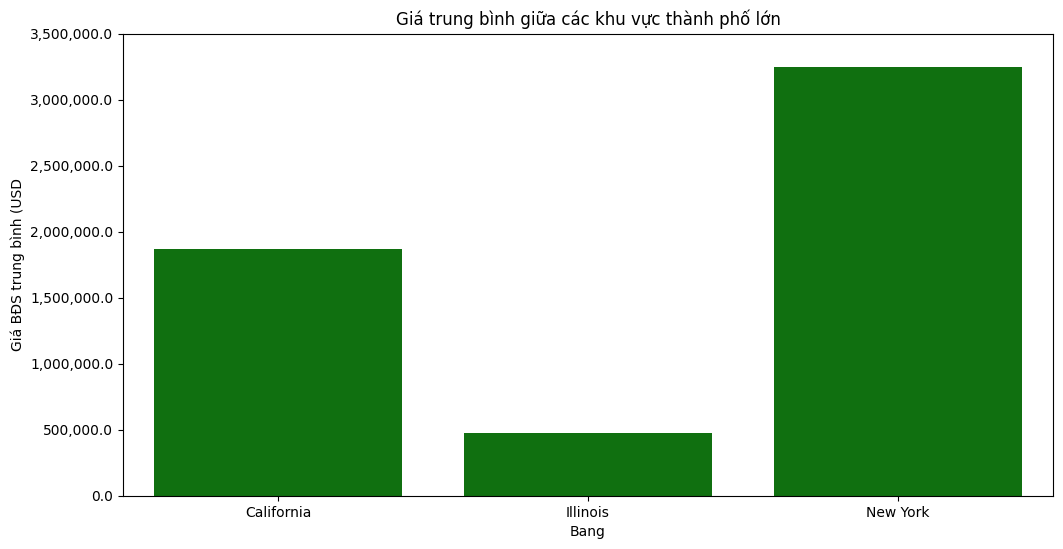

In [88]:
average_state = df_city.groupby('state')['price'].mean()

plt.figure(figsize =(12,6))
sns.barplot(x =average_state.index, y =average_state.values, color = 'green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các khu vực thành phố lớn')
plt.xlabel('Bang')
plt.ylabel('Giá BĐS trung bình (USD')

Text(0, 0.5, 'USD')

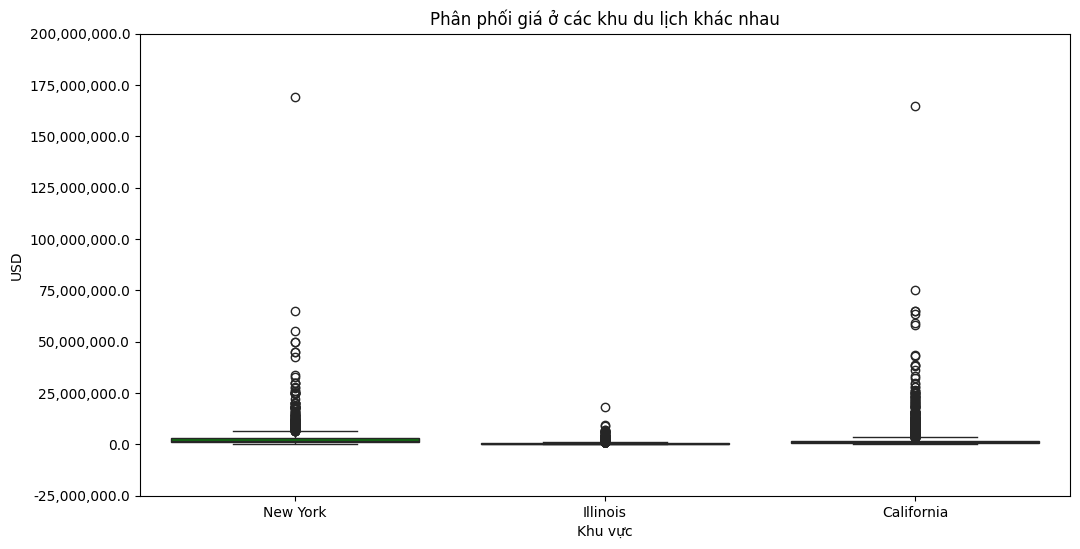

In [89]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'state', y = 'price', data = df_city, color = 'Green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])


plt.title('Phân phối giá ở các khu du lịch khác nhau')
plt.xlabel('Khu vực')
plt.ylabel('USD')

''

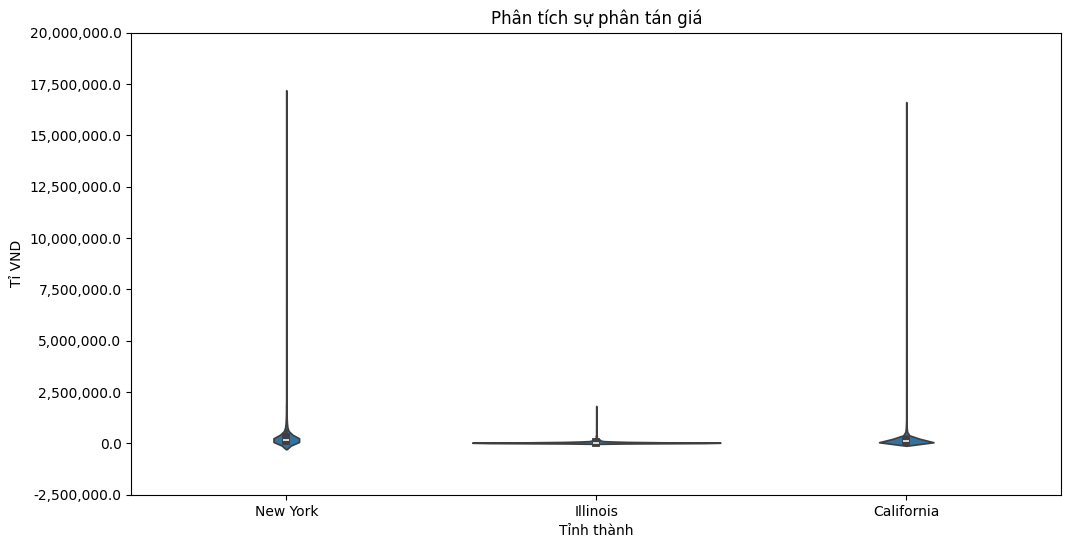

In [90]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='state', y='price', data=df_city)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in yticks])

plt.title('Phân tích sự phân tán giá')
plt.xlabel('Tỉnh thành')
plt.ylabel('Tỉ VND')
;

Text(0, 0.5, 'Giá USD')

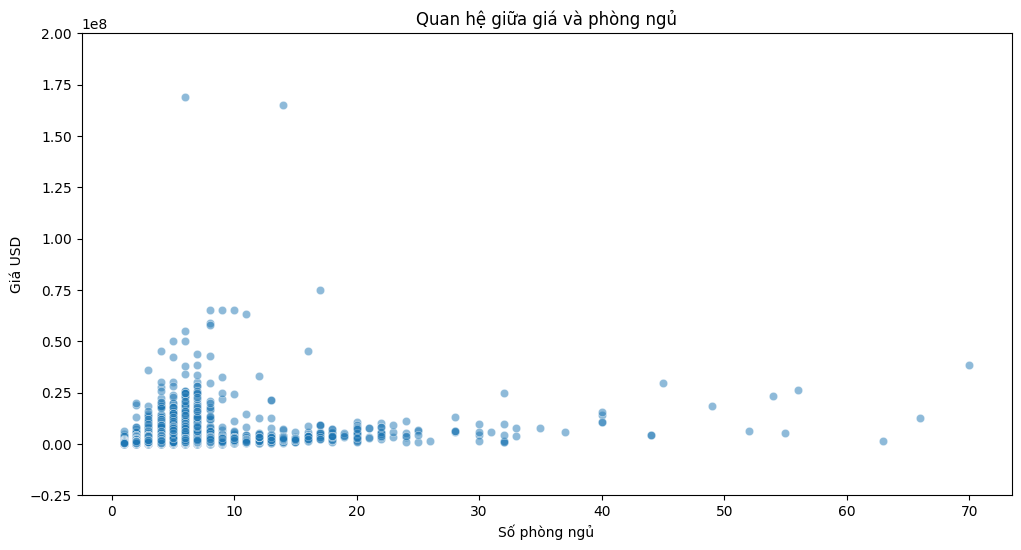

In [91]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='bed', y='price', data=df_city, alpha=0.5)

yticks = plt.yticks()[0]
plt.yticks(yticks,label = [f'{float(tick) / (10):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và phòng ngủ')

plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá USD')

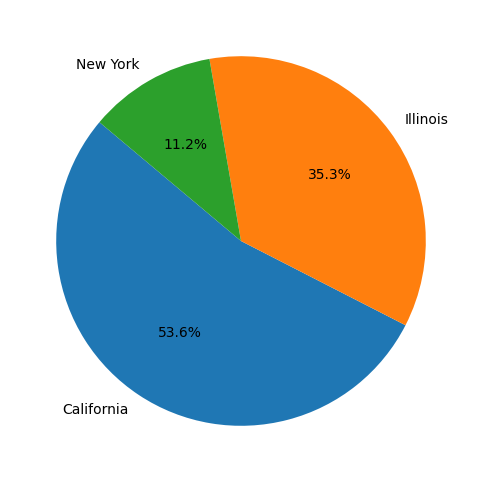

In [92]:
real_estate_counts = df_city['state'].value_counts()

plt.figure(figsize = (12,6))
plt.pie(real_estate_counts, labels = real_estate_counts.index, autopct ='%1.1f%%', startangle = 140);

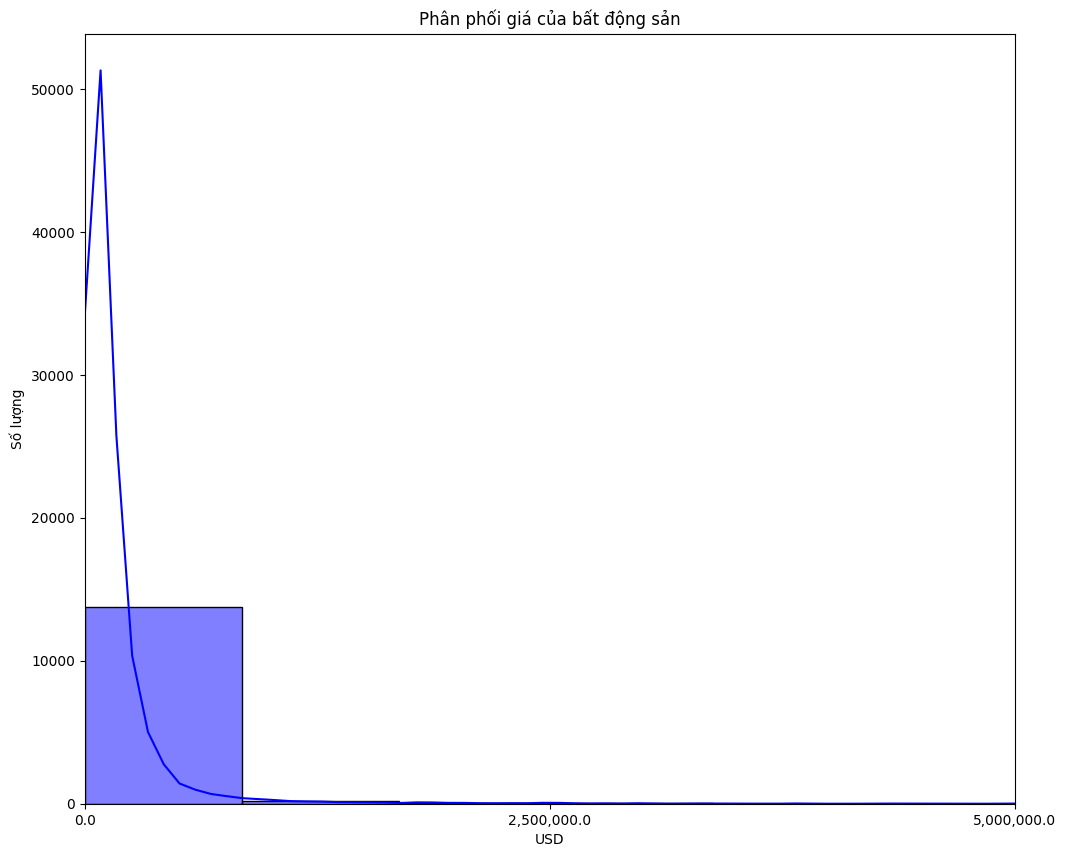

In [96]:
plt.figure(figsize=(12, 10))
sns.histplot(df_city['price'], kde=True, color='blue',bins = 20)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in xticks])
plt.xlim(0)
plt.xlim(0,50000000)

plt.title('Phân phối giá của bất động sản')
plt.xlabel('USD')
plt.ylabel('Số lượng');

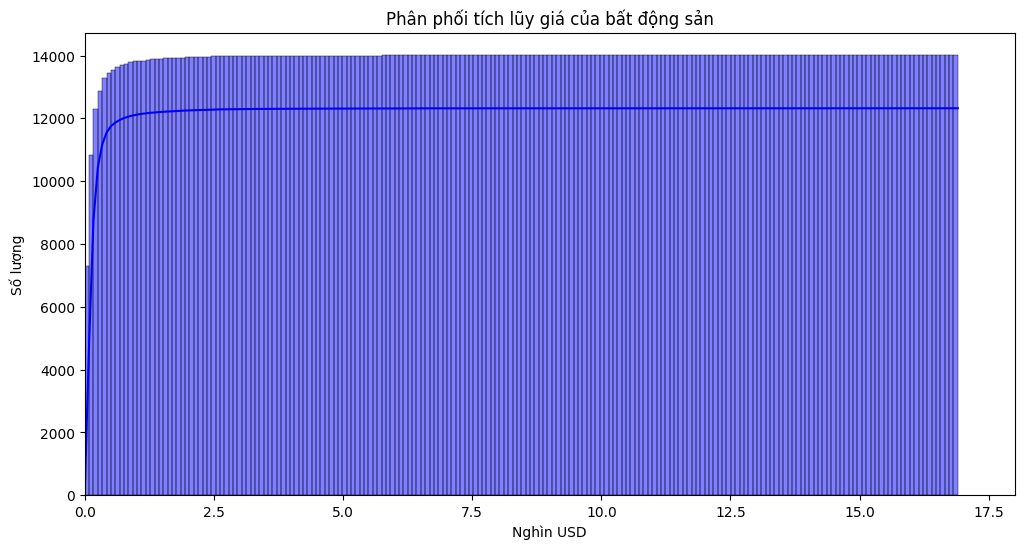

In [97]:
plt.figure(figsize=(12, 6))
sns.histplot(df_city['price'], kde=True, color='blue', cumulative=True, bins=200)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**6)):,.1f}' for tick in xticks])
plt.xlim(0,180000000)

plt.title('Phân phối tích lũy giá của bất động sản')
plt.xlabel('Nghìn USD')
plt.ylabel('Số lượng');

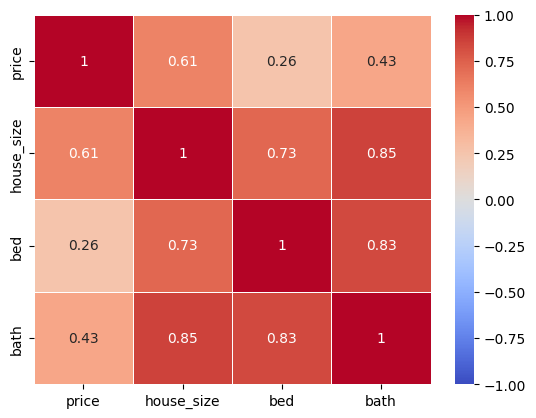

In [98]:
# Heatmap: Tương quan giữa giá và các yếu tố khác.
corr_matrix = df_city[['price', 'house_size','bed', 'bath']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5);

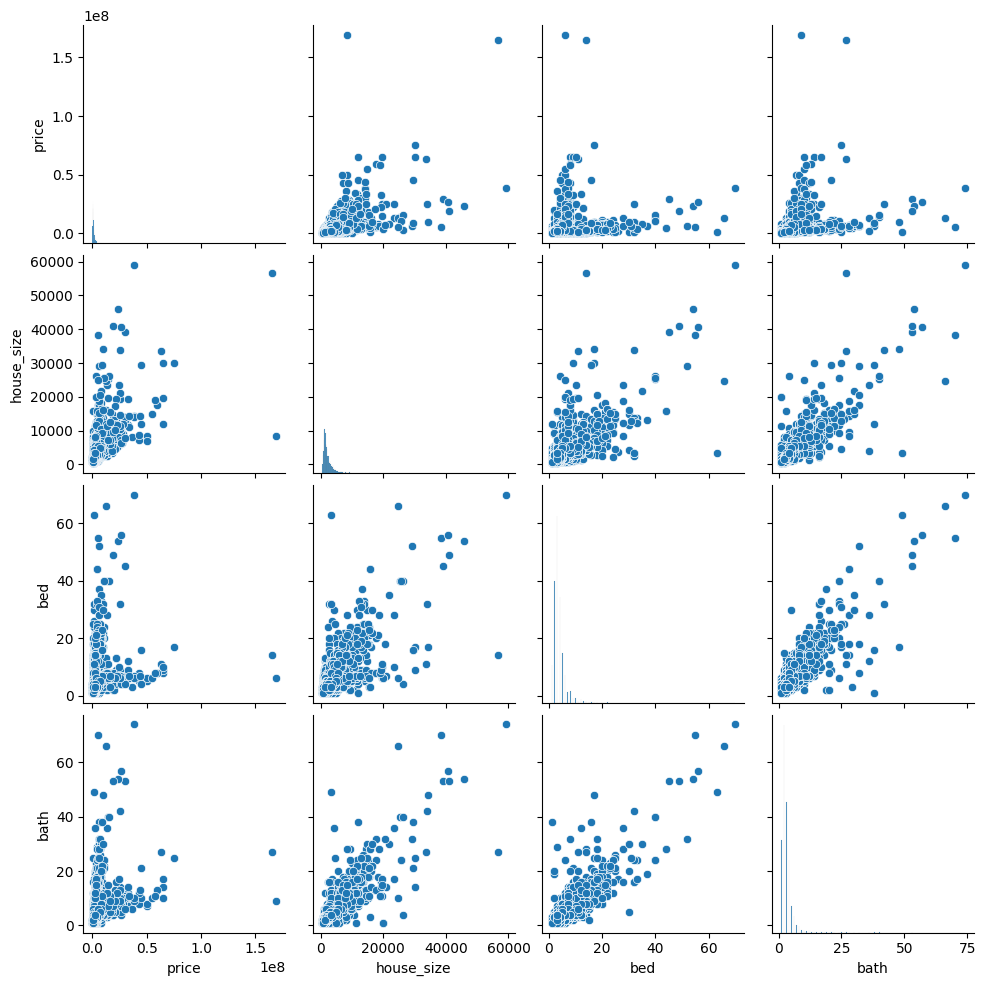

In [99]:
sns.pairplot(df_city[['price', 'house_size','bed', 'bath']]);

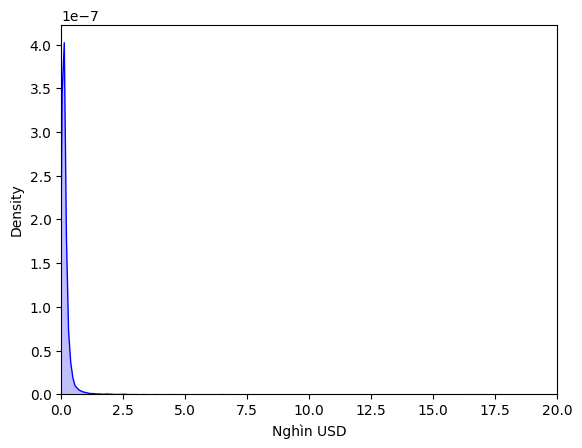

In [100]:
sns.kdeplot(df_city['price'], color='blue', fill=True)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**6)):,.1f}' for tick in xticks])
plt.xlim(0)

plt.xlabel('Nghìn USD');

''

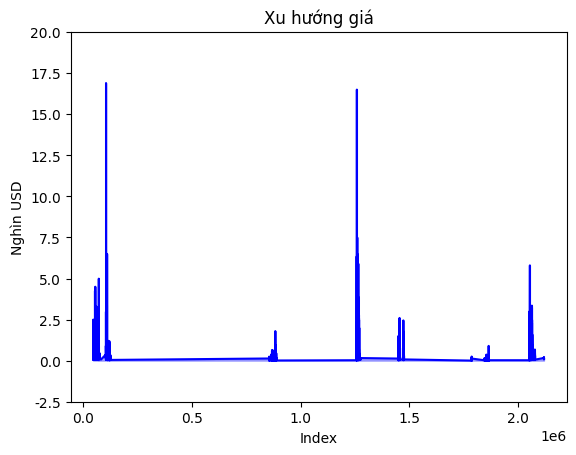

In [101]:
sns.lineplot(data=df_city['price'], color='blue')
plt.fill_between(df_city.index, df_city['price'], color='blue', alpha=0.3)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(10**6)):,.1f}' for tick in yticks])

plt.title('Xu hướng giá')
plt.xlabel('Index')
plt.ylabel('Nghìn USD')
;


''

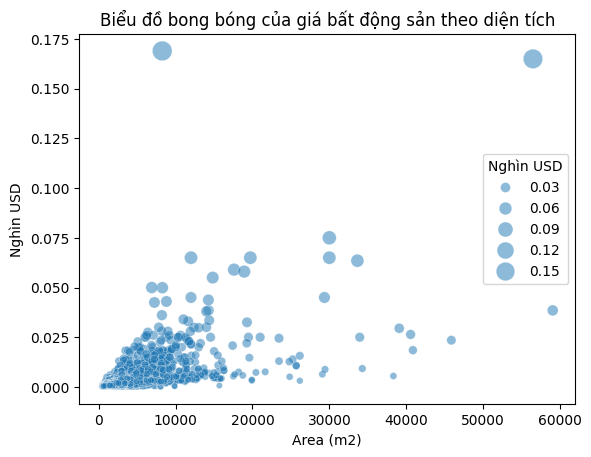

In [102]:
price_billion = df_city['price'].apply(lambda x: x/(10**9))

sns.scatterplot(x=df_city.house_size, y=price_billion, size=price_billion, sizes=(20, 200), alpha=0.5)

plt.title('Biểu đồ bong bóng của giá bất động sản theo diện tích')
plt.xlabel('Area (m2)')
plt.ylabel('Nghìn USD')

plt.legend(title='Nghìn USD', fontsize='10')

;

In [103]:
# Huấn luyện mô hình
X = df_city[['house_size', 'bed', 'bath']]
Y = df_city[['price']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
price_predictions = model.predict(X_test)

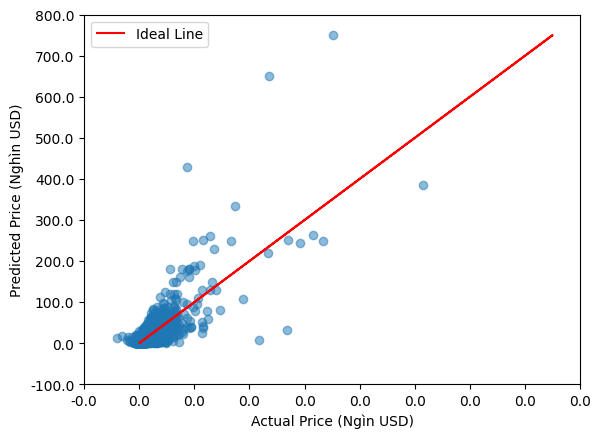

In [121]:
# Visualize khả năng dự đoán
plt.scatter(x=price_predictions, y=Y_test.values, alpha=0.5)
plt.plot(Y_test.values, Y_test.values, color='red', label='Ideal Line')

plt.ylabel('Predicted Price (Nghìn USD)')
plt.xlabel('Actual Price (Ngìn USD)')
plt.legend()

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**9)):,.1f}' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(10**4)):,.1f}' for tick in yticks]);

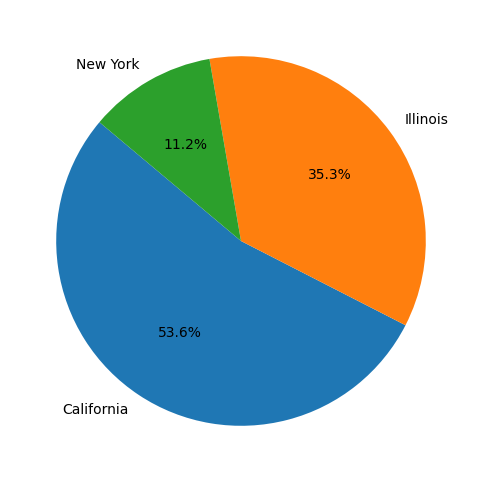

In [125]:
real_estate_counts = df_city['state'].value_counts()
plt.figure(figsize = (12,6) )
plt.pie(real_estate_counts, labels = real_estate_counts.index, autopct = '%1.1f%%', startangle = 140);